**ENVIRONMENT SETUP**


In [1]:
# for dowloading matplotlib and seaborn
!pip install matplotlib
!pip install seaborn --quiet
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\hp\anaconda3\lib\site-packages (0.12.2)


**Importing Necessary Libraries**

In [2]:
# For data analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')




**LOAD THE DATA**

In [3]:
url = 'https://www.dropbox.com/scl/fi/dphb7fgul2y5e6u5u94ly/day.csv?rlkey=r86coe2t7mwo3d2bk04i3fhkc&st=co3kgid3&dl=1'
bike_sharing_data = pd.read_csv(url)

**DATA STUDY**


In [4]:
#checking the main columns of the data along with the values
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# listing all the columns of the data
bike_sharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
#checking the shape of the data i.e, - No. of Rows and Columns
bike_sharing_data.shape

(730, 16)

In [8]:
#getting info of the data
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# Getting information on the data columns-data type
# This line of code shows all
# The output without truncation for better analysis
with pd.option_context('display.max_rows', None):
  print(bike_sharing_data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [10]:
# Checking the data

bike_sharing_data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


**Checking Null/Missing values in the dataset**

In [11]:
# Counting the null values in each column
with pd.option_context('display.max_rows', None):
  print(bike_sharing_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
# Counting the NaN values in each column
with pd.option_context('display.max_rows', None):
  print(bike_sharing_data.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Checking for duplicates in the dataset**

In [13]:
# Counting the duplicate values in each column

with pd.option_context('display.max_rows', None):
  print(bike_sharing_data.duplicated().sum())


0


**Insights :**

*  The bike sharing data contains 730 Rows and 16 Columns.
*  There are no missing values and null values found.
*  There are no duplicates data present.  
*  Most of the columns are integers and float, only one column is object i.e
   'dteday'. Hence it should be convert into date datatype.
*  The min value of Humidity is 0. It's not possible practically, because water
   vapor is always present in the air.
*  Some categorial columns have integer datatype. Hence, we will check it and decide that to    convert it to dummy variables or not.

   






**DATA CLEANING**


Based on the study of data we found below observations :

*   instant - This column has index variale, so that it doesn't make any siginficance for model. Hence we will drop this column.
*   dteday - The data have year, month and weekday as separate columns, so that we will drop this column.
*   cnt - cnt = casual + registered, hence we will drop both casual and registered columns and treate "cnt" as target variable






In [14]:
# Dropping unnecessary columns and save in new dataframe
bike_sharing_data_filtered = bike_sharing_data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Checking the data after dropping the columns

bike_sharing_data_filtered.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
bike_sharing_data_filtered.shape

(730, 12)

In [16]:
# Converting columns 'season','mnth','weekday' and 'weathersit' integer to categorical datatype
bike_sharing_data_filtered['season'] = bike_sharing_data_filtered['season'].astype('category')
bike_sharing_data_filtered['mnth'] = bike_sharing_data_filtered['mnth'].astype('category')
bike_sharing_data_filtered['weekday'] = bike_sharing_data_filtered['weekday'].astype('category')
bike_sharing_data_filtered['weathersit'] = bike_sharing_data_filtered['weathersit'].astype('category')

# Checking the data types after conversion
bike_sharing_data_filtered.dtypes

season        category
yr               int64
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [17]:
# Checking the value counts for 'season' column
print(bike_sharing_data_filtered['season'].value_counts().sort_values())

# Checking the value counts for 'mnth' column
print(bike_sharing_data_filtered['mnth'].value_counts().sort_values())

# Checking the value counts for 'weekday' column
print(bike_sharing_data_filtered['weekday'].value_counts().sort_values())

4    178
1    180
2    184
3    188
Name: season, dtype: int64
2     56
4     60
6     60
9     60
11    60
1     62
3     62
5     62
7     62
8     62
10    62
12    62
Name: mnth, dtype: int64
3    103
2    104
4    104
5    104
0    105
1    105
6    105
Name: weekday, dtype: int64


In [18]:
# Mapping the numeric values to their categorical values
bike_sharing_data_filtered['season'] = bike_sharing_data_filtered['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_sharing_data_filtered['mnth'] = bike_sharing_data_filtered['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_sharing_data_filtered['weekday'] = bike_sharing_data_filtered['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})


In [19]:
# Checking the value counts after mapping
print(bike_sharing_data_filtered['season'].value_counts().sort_index())
print(bike_sharing_data_filtered['mnth'].value_counts().sort_index())
print(bike_sharing_data_filtered['weekday'].value_counts().sort_index())

spring    180
summer    184
fall      188
winter    178
Name: season, dtype: int64
Jan     62
Feb     56
Mar     62
Apr     60
May     62
June    60
July    62
Aug     62
Sep     60
Oct     62
Nov     60
Dec     62
Name: mnth, dtype: int64
Sun    105
Mon    105
Tue    104
Wed    103
Thu    104
Fri    104
Sat    105
Name: weekday, dtype: int64


**Exploratory Data Analysis (EDA)**

**Univariate Analysis**

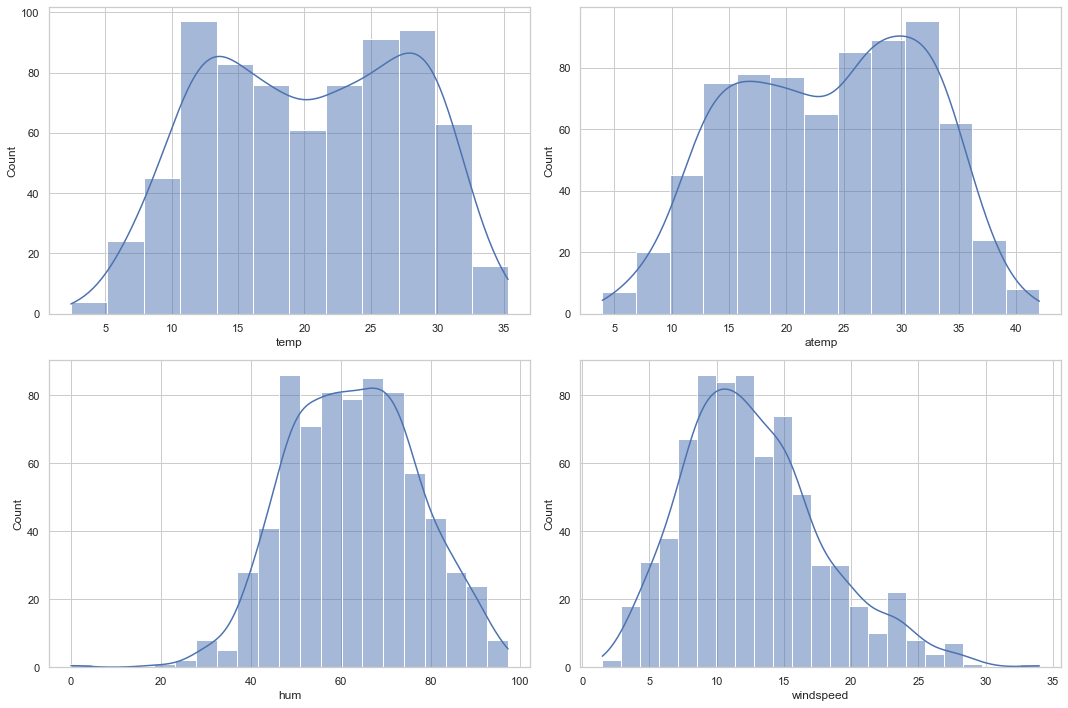

In [20]:
# Analysing the continuous (numerical) variables
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.histplot(data=bike_sharing_data_filtered, x='temp', kde=True, ax=axes[0,0])
sns.histplot(data=bike_sharing_data_filtered, x='atemp', kde=True, ax=axes[0,1])
sns.histplot(data=bike_sharing_data_filtered, x='hum', kde=True, ax=axes[1,0])
sns.histplot(data=bike_sharing_data_filtered, x='windspeed', kde=True, ax=axes[1,1])
plt.tight_layout()
plt.show()


**Insights :**
*   temp - Bikes were rented at an average temperature  of 20°C.
*   atemp - The average feeling temperature during bike rentals is approximately 24°C.
*   hum - Humidity averaged around 62 during bike rentals.
*   windspeed - The average windspeed during bike rentals is approximately 12.





**Bivariate Analysis**

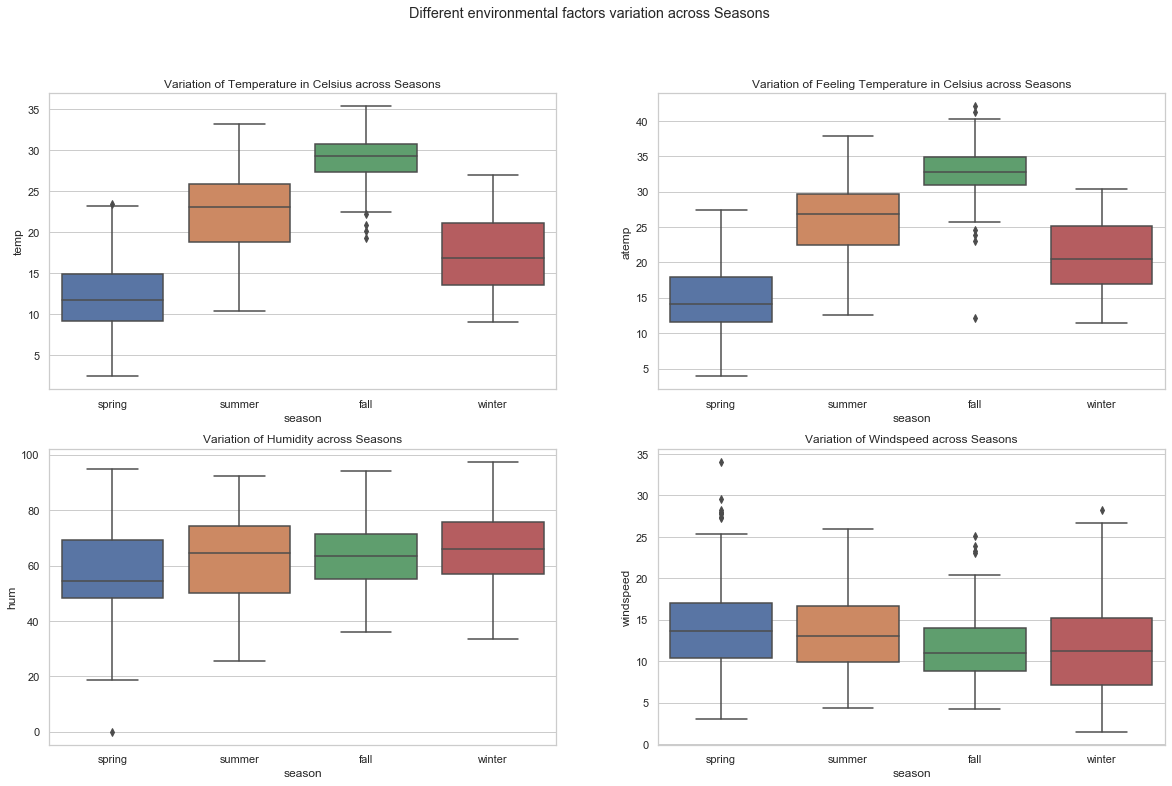

In [21]:
# Checking distribution of values for numeric columns with season by plotting boxplots
plt.figure(figsize=(20,12))
plt.suptitle("Different environmental factors variation across Seasons")
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'temp', data = bike_sharing_data_filtered)
plt.title("Variation of Temperature in Celsius across Seasons")
plt.subplot(2,2,2)
sns.boxplot(x = 'season', y = 'atemp', data = bike_sharing_data_filtered)
plt.title("Variation of Feeling Temperature in Celsius across Seasons")
plt.subplot(2,2,3)
sns.boxplot(x = 'season', y = 'hum', data = bike_sharing_data_filtered)
plt.title("Variation of Humidity across Seasons")
plt.subplot(2,2,4)
sns.boxplot(x = 'season', y = 'windspeed', data = bike_sharing_data_filtered)
plt.title("Variation of Windspeed across Seasons")
plt.show()


**Insights :**
*   Temperature and Feeling Temperature have huge variation in various seasons.
*   Humidity and windspeed have not much variation in various seasons.
*   Temperature has outliers for fall and spring seasons, but Feeling Temperature have outlier only for fall season.
*   Windspeed has outliers for spring, fall and winter seasons.
*   Humidity have only one outlier at 0 for spring season, which is an impossible option.







In [22]:
# Checking the number of records where humidity is 0 with details of those records
bike_sharing_data_filtered[bike_sharing_data_filtered['hum'] == 0]


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
68,spring,0,Mar,0,Thu,1,3,15.952731,19.2834,0.0,17.545759,623


In [23]:
# Imputing the 0 Humidity value with the mean value for spring season

# Calculating the mean humidity for spring season
mean_humidity_spring = bike_sharing_data_filtered[bike_sharing_data_filtered['season'] == 'spring']['hum'].mean()

# Imputing the 0 humidity value with the mean value for spring season
bike_sharing_data_filtered['hum'] = bike_sharing_data_filtered.apply(lambda x: mean_humidity_spring if x['season'] == 'spring' and x['hum'] == 0 else x['hum'], axis=1)

# Checking the number of records where humidity is 0 after imputing the mean value
bike_sharing_data_filtered[bike_sharing_data_filtered['hum'] == 0]


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


**Relation between Numeric variables**


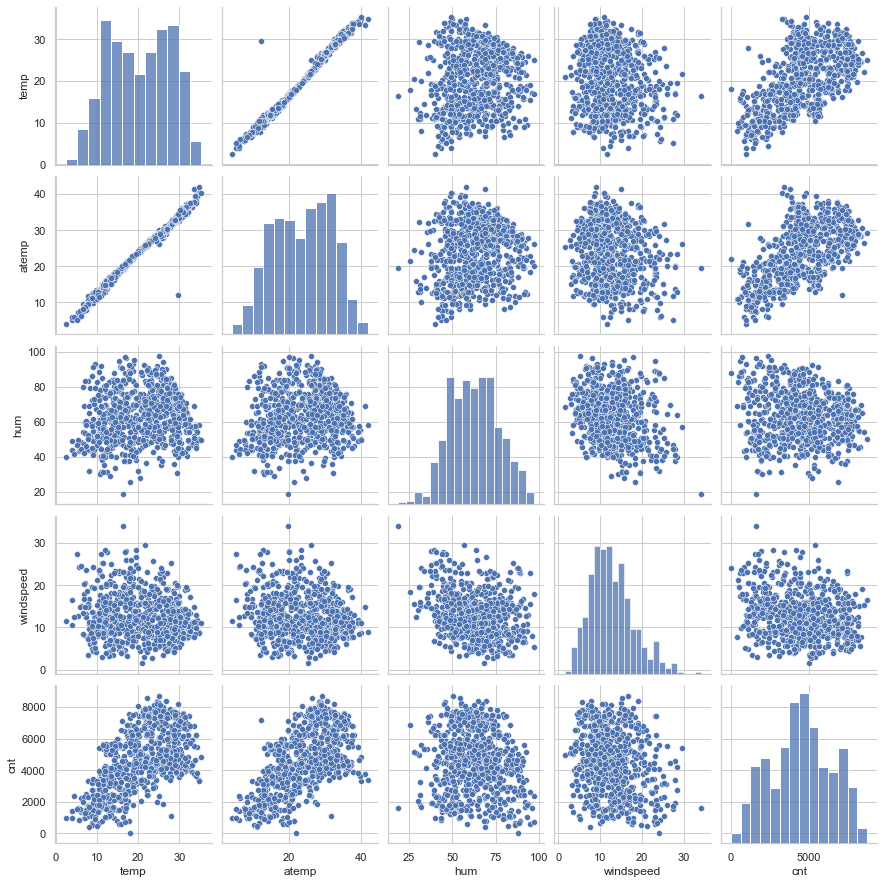

In [24]:
# Pairplots to see the relation between numeric variables
sns.pairplot(bike_sharing_data_filtered, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()


**Insights :**

*   Temperature and Feeling temperature have high correlation with each other.
*   Temperature and Feeling temperature have high correlation with cnt.



**Relation between Categorical variables**

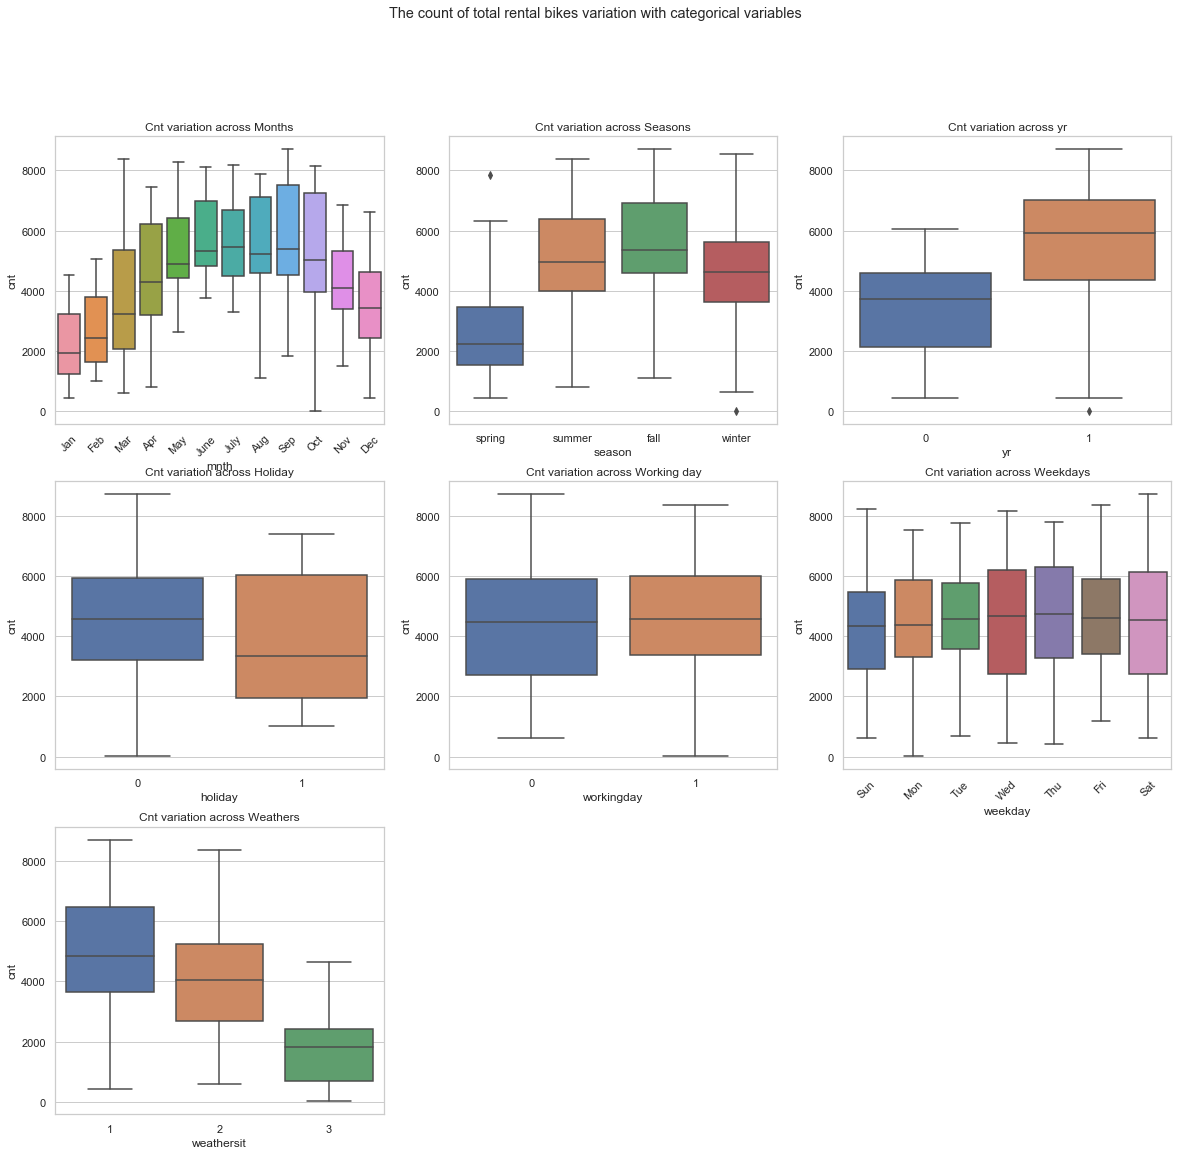

In [25]:
# Checking the relation between categorical Columns and cnt by plotting boxplots
plt.figure(figsize=[20,18])
plt.suptitle("The count of total rental bikes variation with categorical variables")
plt.subplot(3,3,1)
sns.boxplot(data=bike_sharing_data_filtered,x='mnth',y='cnt')
plt.xticks(rotation=45)
plt.title("Cnt variation across Months")
plt.subplot(3,3,2)
sns.boxplot(data=bike_sharing_data_filtered,x='season',y='cnt')
plt.title("Cnt variation across Seasons")
plt.subplot(3,3,3)
plt.title("Cnt variation across yr")
sns.boxplot(data=bike_sharing_data_filtered,x='yr',y='cnt')
plt.subplot(3,3,4)
sns.boxplot(data=bike_sharing_data_filtered,x='holiday',y='cnt')
plt.title("Cnt variation across Holiday")
plt.subplot(3,3,5)
sns.boxplot(data=bike_sharing_data_filtered,x='workingday',y='cnt')
plt.title("Cnt variation across Working day")
plt.subplot(3,3,6)
sns.boxplot(data=bike_sharing_data_filtered,x='weekday',y='cnt')
plt.xticks(rotation=45)
plt.title("Cnt variation across Weekdays")
plt.subplot(3,3,7)
sns.boxplot(data=bike_sharing_data_filtered,x='weathersit',y='cnt')
plt.title("Cnt variation across Weathers")
plt.show()


**Insights :**
*   Cnt is higher during April to October months.
*   Cnt is higher for fall and then followed by Summer, Winter and Spring.
*   Cnt is increased significantly in year of 2019 compared to 2018.
*   Cnt is decreased during holidays.
*   Working Day and Non-Working Day shows almost similar behaviour in box plot.
*   The median is almost similar for all weekdays.
*   Cnt is higher on Clear, Few clouds, Partly cloudy and Partly cloudy weather followed by Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist,Light Snow, Light Rain + Thunderstorm + Scattered clouds and Light Rain + Scattered clouds weather.
*   No records found for cnt in Heavy Rain + Ice Pallets + Thunderstorm + Mist and Snow + Fog weather condition.








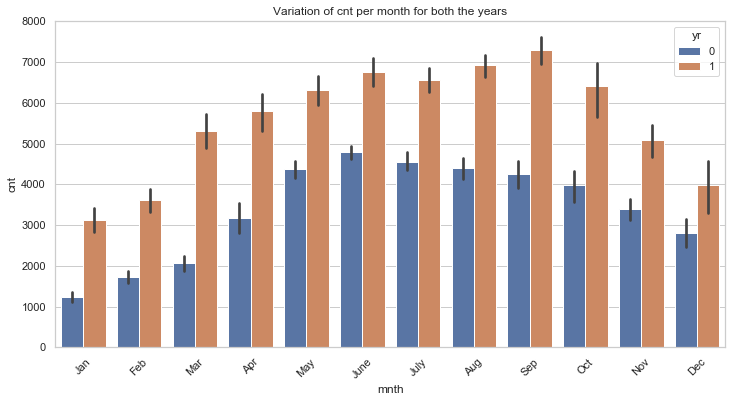

In [26]:
# The variation of cnt variable per month for both the years 2018 and 2019 ((0: 2018, 1:2019))

plt.figure(figsize=(12,6))
sns.barplot(x='mnth',y='cnt',hue='yr',data=bike_sharing_data_filtered)
plt.title("Variation of cnt per month for both the years")
plt.xticks(rotation=45)
plt.show()


**Insight :**
Variation in cnt is high from July to September in 2019 compared to 2018.

**Multivariate Analysis**

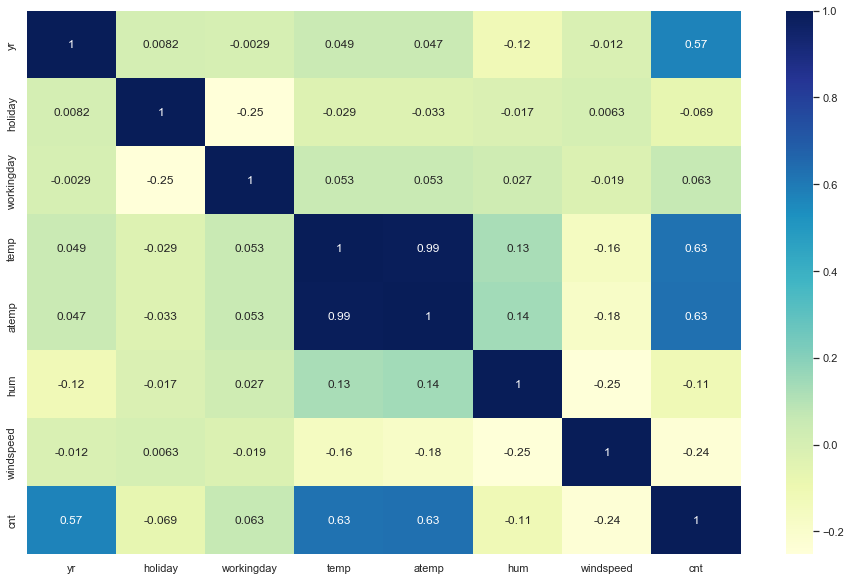

In [27]:
# Checking correlation between variables
plt.figure(figsize = (16, 10))
# Select only numeric columns for correlation calculation
numeric_data = bike_sharing_data_filtered.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot = True, cmap="YlGnBu")
plt.show()


**Insights :**

From the above heatmap -
*   temp and atemp, these two variables are highly correlated (0.99).
*   Both temperature and feeling temperature have a strong positive correlation with cnt (0.63 and 0.63 respectively).
*   Humidity has a negative correlation with cnt (-0.1). That means humidity increases, then the count of total rental bikes decrease slightly.
*   Windspeed has a negative correlation with cnt (-0.23). That means higher windspeed might lead to a decrease in the count of total rental bikes.





In [28]:
# Temperature and Feeling temperature are highly correlated, it means both are closely related.
# Hence For model building, we can dropped 'atemp' to avoid multicollinearity.
bike_sharing_data_filtered = bike_sharing_data_filtered.drop(['atemp'], axis=1)

# Checking the columns after dropping
bike_sharing_data_filtered.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

**Dummy Variables**

In [29]:
#we need to filter the columns that have more than 2 unique variables
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
bike_sharing_data_filtered[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [30]:
# Creating dummy variables for season, mnth, weekday and weathersit
dummy_columns=['mnth','weathersit','weekday','season']
bike_sharing_data_dummy=pd.get_dummies(bike_sharing_data_filtered[dummy_columns],drop_first=True,dtype=int)



In [31]:
# Checking the data after creating dummy variables
bike_sharing_data_dummy.head()


,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_June,mnth_July,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,...,weathersit_3,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,season_summer,season_fall,season_winter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [32]:
# Concatenating the dummy variables dataframe with the original dataframe
bike_sharing_data_new = pd.concat([bike_sharing_data_filtered, bike_sharing_data_dummy], axis=1)

# Checking the data after concatenation
bike_sharing_data_new.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,weathersit_3,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,season_summer,season_fall,season_winter
0,spring,0,Jan,0,Sat,0,2,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,1,0,0,0
1,spring,0,Jan,0,Sun,0,2,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,1,8.050924,43.7273,16.636703,...,0,1,0,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,1,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,1,9.305237,43.6957,12.522300,...,0,0,0,1,0,0,0,0,0,0


In [33]:
# Dropping 'mnth','weathersit','season' and 'weekday' as we created dummy variables for those
bike_sharing_data_new = bike_sharing_data_new.drop(['mnth','weathersit','season','weekday'], axis=1)

# Checking the data after dropping
bike_sharing_data_new.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Feb,mnth_Mar,mnth_Apr,...,weathersit_3,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,season_summer,season_fall,season_winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
# Checking the rows and columns of our new dataframe after concatenation
bike_sharing_data_new.shape

(730, 29)

**Splitting the Data into Testing Sets and Training dataset**

In [35]:
#Dividing into X and Y sets for the model building training dataset
X = bike_sharing_data_new.drop('cnt', axis = 1)
y = bike_sharing_data_new['cnt']
# Splitting the data into 70% train and 30% test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.70, random_state = 100)


In [36]:
# Checking the shape of training
print(X_train.shape)
print(y_train.shape)

# Checking the shape of test dataset
print(X_test.shape)
print(y_test.shape)

(510, 28)
(510,)
(220, 28)
(220,)


In [37]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,...,weathersit_3,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,season_summer,season_fall,season_winter
576,1,0,1,29.246653,70.4167,11.083475,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
426,1,0,0,16.980847,62.1250,10.792293,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
111,0,0,1,13.803347,72.9583,14.707907,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


**Feature Scaling using StandardScaler**

In [38]:
#Rescaling the training dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [39]:
# Fit and transform training set
X_train_scaler=pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns,index=X_train.index)

# Checking X variables
X_train_scaler.head()

,yr,holiday,workingday,temp,hum,windspeed,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,...,weathersit_3,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,season_summer,season_fall,season_winter
576,0.984435,-0.161731,0.691564,1.230870,0.517904,-0.331282,-0.267261,-0.32969,-0.291730,-0.303442,...,-0.174078,-0.421698,2.571369,-0.434524,-0.392232,-0.382188,-0.428129,-0.572822,1.675103,-0.572822
426,0.984435,-0.161731,-1.445998,-0.421238,-0.080277,-0.386359,-0.267261,3.03315,-0.291730,-0.303442,...,-0.174078,-0.421698,-0.388898,-0.434524,-0.392232,-0.382188,2.335743,-0.572822,-0.596978,-0.572822
728,0.984435,-0.161731,-1.445998,-1.295618,-1.075240,2.017388,-0.267261,-0.32969,-0.291730,-0.303442,...,-0.174078,-0.421698,-0.388898,-0.434524,-0.392232,-0.382188,-0.428129,-0.572822,-0.596978,-0.572822
482,0.984435,-0.161731,-1.445998,-0.628327,-1.030151,-0.780539,-0.267261,-0.32969,3.427827,-0.303442,...,-0.174078,-0.421698,-0.388898,-0.434524,-0.392232,-0.382188,2.335743,1.745743,-0.596978,-0.572822
111,-1.015811,-0.161731,0.691564,-0.849222,0.701261,0.354275,-0.267261,-0.32969,3.427827,-0.303442,...,-0.174078,-0.421698,-0.388898,-0.434524,-0.392232,2.616516,-0.428129,1.745743,-0.596978,-0.572822


In [40]:
# Checking the summary of the normalized train data
X_train_scaler.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
yr,510.0,-3.091209e-17,1.000982,-1.015811,-1.015811,0.984435,0.984435,0.984435
holiday,510.0,-1.570639e-16,1.000982,-0.161731,-0.161731,-0.161731,-0.161731,6.183104
workingday,510.0,-3.748635e-16,1.000982,-1.445998,-1.445998,0.691564,0.691564,0.691564
temp,510.0,-2.920322e-16,1.000982,-2.381884,-0.875687,0.022853,0.876521,2.050027
hum,510.0,-6.394123e-16,1.000982,-3.206436,-0.785167,0.014409,0.722306,2.438689
windspeed,510.0,5.828671e-17,1.000982,-1.891589,-0.717441,-0.142189,0.551552,4.003357
mnth_Feb,510.0,7.423256e-17,1.000982,-0.267261,-0.267261,-0.267261,-0.267261,3.741657
mnth_Mar,510.0,4.563887e-16,1.000982,-0.329690,-0.329690,-0.329690,-0.329690,3.033150
mnth_Apr,510.0,-2.155139e-16,1.000982,-0.291730,-0.291730,-0.291730,-0.291730,3.427827
mnth_May,510.0,-3.752989e-16,1.000982,-0.303442,-0.303442,-0.303442,-0.303442,3.295522


In [41]:
# Checking Y variable
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

**Model Building**

**Selecting Features using Recursive Feature Elimination (RFE) approach**

In [42]:
# defined a Linear Regression model
lr = LinearRegression()

# Selecting top 15 features generated using RFE
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train_scaler, y_train)



In [43]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True])

In [44]:
# Checking the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train_scaler.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,yr,True,1
25,season_summer,True,1
24,weekday_Sat,True,1
18,weathersit_3,True,1
17,weathersit_2,True,1
14,mnth_Oct,True,1
26,season_fall,True,1
12,mnth_Aug,True,1
13,mnth_Sep,True,1
3,temp,True,1


In [45]:
# The columns chosen by rfe
rfe_columns = X_train_scaler.columns[rfe.support_]
rfe_columns


Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Mar', 'mnth_Aug',
       'mnth_Sep', 'mnth_Oct', 'weathersit_2', 'weathersit_3', 'weekday_Sat',
       'season_summer', 'season_fall', 'season_winter'],
      dtype='object')

In [46]:
# Get the columns which are rejected using RFE approach
rejected_features = X_train_scaler.columns[~rfe.support_]

# Verifying column names which are rejected
rejected_features

Index(['holiday', 'mnth_Feb', 'mnth_Apr', 'mnth_May', 'mnth_June', 'mnth_July',
       'mnth_Nov', 'mnth_Dec', 'weekday_Mon', 'weekday_Tue', 'weekday_Wed',
       'weekday_Thu', 'weekday_Fri'],
      dtype='object')

In [47]:
# Creating the independent variable dataset using the columns selected by RFE
X_train_rfe = X_train_scaler[rfe_columns]
X_train_rfe.shape

(510, 15)

**Model 1**

In [48]:
# Adding constant to the independent variables
X_train_rfe1 = sm.add_constant(X_train_rfe)

# Fit the OLS model
lr1 = sm.OLS(y_train, X_train_rfe1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.7
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          6.00e-191
Time:                        11:52:37   Log-Likelihood:                -4106.5
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     494   BIC:                             8313.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4485.3373     34.184    131.212

In [49]:
# Calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,season_fall,6.0
3,temp,4.0
13,season_summer,3.0
2,workingday,2.0
4,hum,2.0
7,mnth_Aug,2.0
9,mnth_Oct,2.0
10,weathersit_2,2.0
12,weekday_Sat,2.0
15,season_winter,2.0


**From Model 1 - season_fall: vif= 6 which is higest and more than 5, hence it needs to be dropped.**

In [50]:
# dropping season_fall
X_train_rfe2=X_train_rfe1.drop(['season_fall'], axis=1)

# Checking the columns again after dropping season_fall
X_train_rfe2.columns



Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Mar',
       'mnth_Aug', 'mnth_Sep', 'mnth_Oct', 'weathersit_2', 'weathersit_3',
       'weekday_Sat', 'season_summer', 'season_winter'],
      dtype='object')

**Model 2**

In [51]:
# Adding constant to the independent variables
X_train_rfe2 = sm.add_constant(X_train_rfe2)
# Fit the OLS model
lr2 = sm.OLS(y_train, X_train_rfe2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.56e-191
Time:                        11:52:48   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4485.3373     34.240    130.995

In [52]:
# Calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,2.0
3,temp,2.0
4,hum,2.0
10,weathersit_2,2.0
12,weekday_Sat,2.0
14,season_winter,2.0
0,const,1.0
1,yr,1.0
5,windspeed,1.0
6,mnth_Mar,1.0


**From Model 2 - mnth_Mar has highest p values hence it needs to be dropped.**

In [53]:
# dropping mnth_Mar
X_train_rfe3=X_train_rfe2.drop(['mnth_Mar'], axis=1)

# Checking the columns again after dropping mnth_Mar
X_train_rfe3.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Aug',
       'mnth_Sep', 'mnth_Oct', 'weathersit_2', 'weathersit_3', 'weekday_Sat',
       'season_summer', 'season_winter'],
      dtype='object')

**Model 3**

In [54]:
# Adding constant to the independent variables
X_train_rfe3 = sm.add_constant(X_train_rfe3)
# Fit the OLS model
lr3 = sm.OLS(y_train, X_train_rfe3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.1
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          4.38e-192
Time:                        11:53:04   Log-Likelihood:                -4109.3
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     496   BIC:                             8306.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4485.3373     34.305    130.749

In [55]:
# Calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,2.0
3,temp,2.0
4,hum,2.0
9,weathersit_2,2.0
11,weekday_Sat,2.0
13,season_winter,2.0
0,const,1.0
1,yr,1.0
5,windspeed,1.0
6,mnth_Aug,1.0


**From Model 3 - mnth_Oct has highest p values hence it needs to be dropped.**

In [56]:
# dropping mnth_Oct
X_train_rfe4=X_train_rfe3.drop(['mnth_Oct'], axis=1)

# Checking the columns again after dropping mnth_Oct
X_train_rfe4.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Aug',
       'mnth_Sep', 'weathersit_2', 'weathersit_3', 'weekday_Sat',
       'season_summer', 'season_winter'],
      dtype='object')

**Model 4 - Final Model**

In [57]:
# Adding constant to the independent variables
X_train_rfe4 = sm.add_constant(X_train_rfe4)
# Fit the OLS model
lr4 = sm.OLS(y_train, X_train_rfe4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.3
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.71e-192
Time:                        11:53:19   Log-Likelihood:                -4112.0
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     497   BIC:                             8305.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4485.3373     34.449    130.203

In [58]:
# Calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,2.0
3,temp,2.0
4,hum,2.0
8,weathersit_2,2.0
10,weekday_Sat,2.0
0,const,1.0
1,yr,1.0
5,windspeed,1.0
6,mnth_Aug,1.0
7,mnth_Sep,1.0


**Insights :**

*   Model 4 is our final model.
*   R-Squared value 0.845 and adjusted R-Squared value is 0.841.
*   All VIFs are now below 5.
*   All p-values are below 0.05.





In [59]:
# Checking the coefficients for the features
lr4.params.sort_values(ascending=False)

const            4485.337255
temp             1064.399203
yr                993.186810
season_winter     551.221984
season_summer     387.875808
mnth_Sep          277.511415
workingday        210.159765
weekday_Sat       188.645603
mnth_Aug          134.182891
hum              -219.201084
weathersit_2     -224.078556
windspeed        -273.079051
weathersit_3     -338.531791
dtype: float64

**Model Evaluation**

**Residual Analysis of the train data**

In [60]:
# Predicting the values for Y_train
y_train_pred = lr4.predict(X_train_rfe4)

# Calculating residual
res = y_train - y_train_pred


<Figure size 1080x720 with 0 Axes>

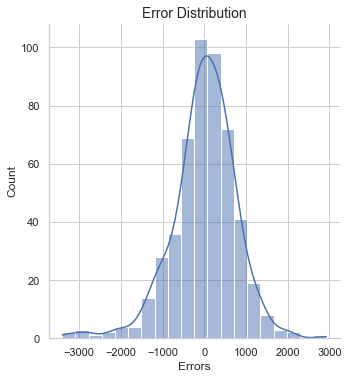

In [61]:
# Plot the histogram of the residual
fig = plt.figure(figsize = (15, 10))
sns.displot(res, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.title('Error Distribution', fontsize = 14)
plt.show()

**Insight :**

Error are normally distributed across 0, that means our model has handled the assumption of Error Normal Distribution properly.

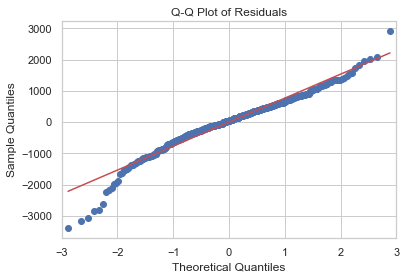

In [62]:
import statsmodels.api as sm
# Plotting the Q-Q plot
sm.qqplot(res, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

**Homoscedasticity**

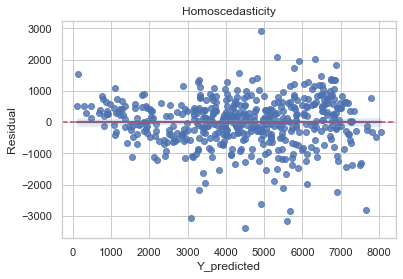

In [63]:
# Plotting Residuals vs Y_predicted
plt.title("Homoscedasticity")
sns.regplot(x=y_train_pred, y=res)
plt.xlabel("Y_predicted")
plt.ylabel("Residual")
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()


**Insight :**

In the above plot, there is no specific pattern found. Hence no relation between Residual & Predicted Values.

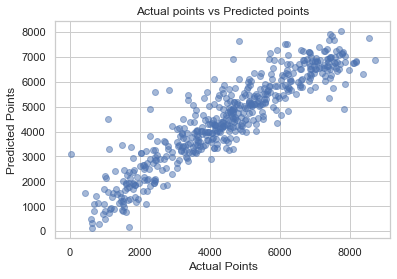

In [64]:
# Checking the Homoscedasticity property by plotting the predicted points vs Actual points
plt.title("Actual points vs Predicted points")
plt.scatter(x=y_train,y=y_train_pred, alpha=0.5)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.show()

**Insight :**

There is equal distribution of the variance from the above graph.



In [65]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)

print(rmse_train)

767.9828578920951


**Insight :**

The linear model's assumptions hold, indicating it is well-trained and ready for testing on the test set.

**Applying the scaling on the Test sets**

In [66]:
# Checking the test data after scaling
X_test_scaler=pd.DataFrame(scaler.fit_transform(X_test),columns=X.columns,index=X_test.index)

# Checking the scaled test data
X_test_scaler.head()

,yr,holiday,workingday,temp,hum,windspeed,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,...,weathersit_3,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,season_summer,season_fall,season_winter
184,-0.964274,5.147815,-1.527525,1.173684,0.129035,-1.438721,-0.333333,-0.240192,-0.316228,-0.307453,...,-0.167444,2.618615,-0.449651,-0.333333,-0.442326,-0.464187,-0.366088,-0.598352,1.753304,-0.556349
535,1.037050,-0.194257,0.654654,1.472711,-0.189330,-1.002162,-0.333333,-0.240192,-0.316228,-0.307453,...,-0.167444,-0.381881,-0.449651,3.000000,-0.442326,-0.464187,-0.366088,1.671258,-0.570352,-0.556349
299,-0.964274,-0.194257,0.654654,-0.200958,1.344590,0.131346,-0.333333,-0.240192,-0.316228,-0.307453,...,-0.167444,-0.381881,-0.449651,-0.333333,2.260777,-0.464187,-0.366088,-0.598352,-0.570352,1.797434
221,-0.964274,-0.194257,0.654654,1.387913,-1.355680,0.165034,-0.333333,-0.240192,-0.316228,-0.307453,...,-0.167444,-0.381881,-0.449651,3.000000,-0.442326,-0.464187,-0.366088,-0.598352,1.753304,-0.556349
152,-0.964274,-0.194257,0.654654,1.111198,-2.183417,1.407612,-0.333333,-0.240192,-0.316228,-0.307453,...,-0.167444,-0.381881,-0.449651,-0.333333,2.260777,-0.464187,-0.366088,1.671258,-0.570352,-0.556349


In [67]:
# Checking the summary of the test data
X_test_scaler.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr,220.0,-9.083643e-18,1.002281,-0.964274,-0.964274,-0.964274,1.037050,1.037050
holiday,220.0,4.112872e-17,1.002281,-0.194257,-0.194257,-0.194257,-0.194257,5.147815
workingday,220.0,2.997602e-16,1.002281,-1.527525,-1.527525,0.654654,0.654654,0.654654
temp,220.0,6.560409e-18,1.002281,-2.201211,-0.873773,-0.002348,0.847873,1.829762
hum,220.0,-5.046468e-17,1.002281,-2.536505,-0.734878,-0.085136,0.711645,2.453059
windspeed,220.0,3.521173e-16,1.002281,-2.236522,-0.718809,-0.082695,0.561646,3.103750
mnth_Feb,220.0,-2.826022e-17,1.002281,-0.333333,-0.333333,-0.333333,-0.333333,3.000000
mnth_Mar,220.0,1.353715e-16,1.002281,-0.240192,-0.240192,-0.240192,-0.240192,4.163332
mnth_Apr,220.0,-3.532528e-18,1.002281,-0.316228,-0.316228,-0.316228,-0.316228,3.162278
mnth_May,220.0,-9.184572e-17,1.002281,-0.307453,-0.307453,-0.307453,-0.307453,3.252529


In [68]:
# Checking Y variables
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [69]:
# Get the column names of the final model (excluding the constant)
final_columns = lr4.params.index[1:]
print(final_columns)

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Aug', 'mnth_Sep',
       'weathersit_2', 'weathersit_3', 'weekday_Sat', 'season_summer',
       'season_winter'],
      dtype='object')


In [70]:
# Filtering the test data on the basis of columns used in the final model
X_test_new = X_test_scaler[final_columns]

# Adding a constant variable
X_test_rfe5 = sm.add_constant(X_test_new)


In [71]:
# Predicting the cnt for test data using final model
y_pred = lr4.predict(X_test_rfe5)


**Calculating R square Scores and Adjusted R square Scores for the test set**


In [72]:
# Calculate R2 Score for the test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.805381975170079

In [73]:
# Calculating the Adjusted R-squared value
adj_r2=round(1-(1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test_new.shape[1]-1),4)
adj_r2

0.7941

In [74]:
# Calculate mean squared error of the test set
mse_test = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse_test = np.sqrt(mse_test)

print(rmse_test)


838.4748797969406


**Insight :**

R-Squared for test set is 0.8053819751700791 and Adjusted R-Squared value for test set is 0.7941.

**Model Evaluation**

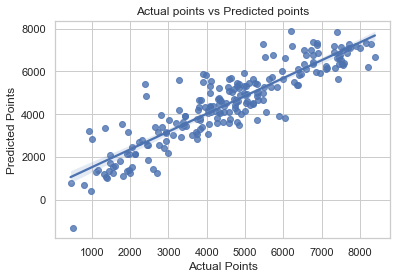

In [75]:
# Plotting Y_test and Y_pred to understand the spread.
plt.title("Actual points vs Predicted points")
sns.regplot(x=y_test,y=y_pred)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.show()



**Final Model Interpretation**

In [76]:
# Checking the coefficients for the features
lr4.params.sort_values(ascending=False)

const            4485.337255
temp             1064.399203
yr                993.186810
season_winter     551.221984
season_summer     387.875808
mnth_Sep          277.511415
workingday        210.159765
weekday_Sat       188.645603
mnth_Aug          134.182891
hum              -219.201084
weathersit_2     -224.078556
windspeed        -273.079051
weathersit_3     -338.531791
dtype: float64

**Equation of the best fit line**

In a multivariate linear regression model, the equation of the best-fit line is given by:

$Y = $$\beta_0$$ + $$\beta_1X_1$$ + $$\beta_2X_2$$ + $$\ldots$$ + $$\beta_nX_n$

- \( Y \): Dependent variable (the variable being predicted), `cnt` in this case.
- \( $\beta_0$ ): Y-intercept

- ( $\beta_1$, $\beta_2$, $\ldots$, $\beta_n$ ): Coefficients for the independent variables ( $X_1$, $X_2$, $\ldots$, $X_n$ \) respectively.

The coefficients are determined through a process that minimizes the sum of squared differences between predicted and actual values. The resulting line provides the best linear fit to the multivariate data.
For our model, the best fit line is determined by the following equation:

cnt = 4485.337 + 993.187 * yr + 210.160 * workingday + 1064.399 * temp - 219.201 * hum - 273.079 * windspeed + 134.183 * mnth_Aug + 277.511 * mnth_Sep - 224.079 * weathersit_2 - 338.532 * weathersit_3 + 188.646 * weekday_Sat + 387.876 * season_summer + 551.222 * season_winter

**Final values of R square Scores and Adjusted R square Scores for training and test set**

In [77]:
# Creating a dataframe for the summary
summary = pd.DataFrame()
# Adding Train R-squared value
summary['Train R-squared'] = [lr4.rsquared]
# Adding Train Adjusted R-squared value
summary['Train Adjusted R-squared'] = [lr4.rsquared_adj]
# Adding Test R-squared value
summary['Test R-squared'] = [r2_score(y_test, y_pred)]
# Adding Test Adjusted R-squared value
summary['Test Adjusted R-squared'] = [adj_r2]
# Transposing the table
summary


,Train R-squared,Train Adjusted R-squared,Test R-squared,Test Adjusted R-squared
0,0.844694,0.840944,0.805382,0.7941


**Conclusion :**

- The equation of the best fit line for our model is given by:
    - **cnt** = 4485.337 + 993.187 * yr + 210.160 * workingday + 1064.399 * temp - 219.201 * hum - 273.079 * windspeed + 134.183 * mnth_Aug + 277.511 * mnth_Sep - 224.079 * weathersit_2 - 338.532 * weathersit_3 + 188.646 * weekday_Sat + 387.876 * season_summer + 551.222 * season_winter
- The R2 and adjusted R2 values between the training and test sets (R2: 0.844 vs. 0.805 and Adjusted R2: 0.840 vs. 0.794) in a linear regression model indicates effective generalization. This similarity suggests the model avoids overfitting to the training data and is likely to perform consistently on new, unseen data.
- Bike demand is influenced by features such as **yr**, **workingday**, **temp**, **hum**, **windspeed**, **mnth_Aug**, **mnth_Sep**,**weathersit_2**, **weathersit_3**, **weekday_Sat**, **season_summer** and **season_winter**.
- Three key feature variables, **temp**, **yr**, and **season_winter**, exhibit the highest coefficient values, indicating their significant impact.
- The RMSE values of **767.982** in the training set and **838.474** in the test set for a linear regression model indicate that the model is fitting well to the training data and generalizing reasonably to new, unseen data with a small difference between training and test set performance.

**Recommendations :**

*   **High-Impact Features:** We need to Focus on features such as **temp**, **yr**, and **season_winter**, because they exhibit the highest coefficient values that indicating significant impact on bike demand.
*   **Seasonal Strategies:** Emphasizing promotions during **season_winter** and **season_summer** to develop targeted marketing and pricing strategies.
*   **Weather Promotions:** Implement weather specific promotions or incentives to encourage bike usage during favorable weather conditions, addressing the impact of **temp**, **hum**, and **windspeed**.
*   **Continuous Monitoring and Adaptation:** Need to update the model with new data and adapt strategies regularly based on evolving market conditions to ensure sustained revenue growth.



